In [17]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    8.0
})

<Figure size 640x480 with 0 Axes>

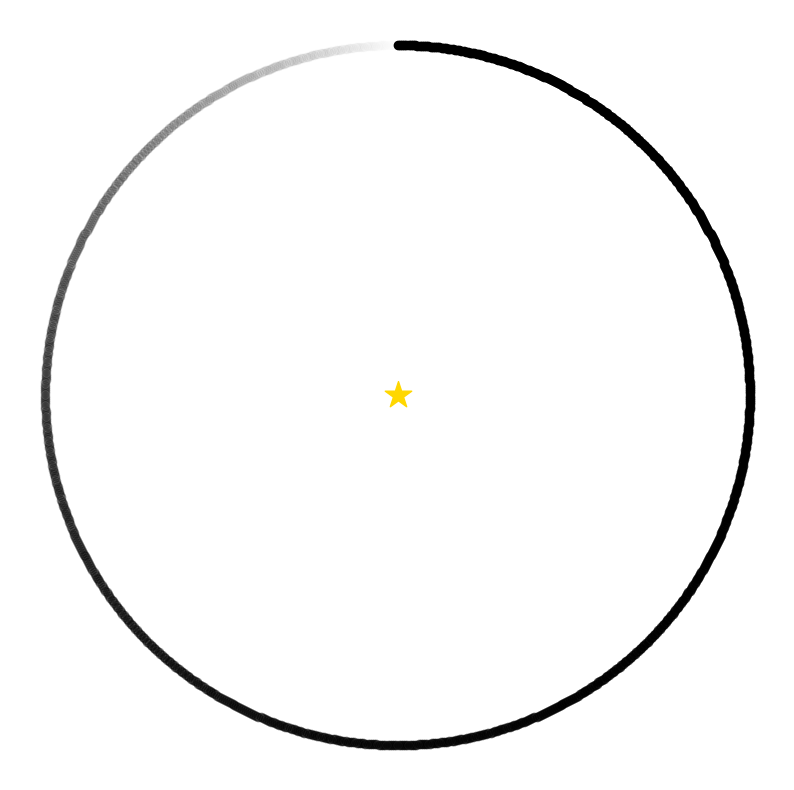

In [18]:

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.scatter(0, 0, marker="*", c="gold", s=400)

n = 1000
x = np.linspace(0, 2*np.pi, n)

alpha = np.linspace(1, 0, n)

for i in range(n):
    plt.scatter(np.sin(x[i]), np.cos(x[i]), alpha=alpha[i], c="k")


plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parameters
radius = 10          # Radius of the orbit
trail_length = 1000    # Number of points in the trail
max_alpha = 0.5
fade_factor = 1.2  # Fade factor for the trail


# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-radius - 1, radius + 1)
# ax.set_ylim(-radius - 1, radius + 1)
ax.set_aspect('equal')
ax.axis('off')

np.random.seed(2024)


# Function to compute trail points
def compute_trail(n_points, radius, angle, inc):
    angles = np.linspace(0, 2 * np.pi, n_points)
    x = radius * np.cos(angles + angle)
    y = radius * np.sin(angles + angle) * np.sin(inc)
    return np.vstack((x, y)).T

def plot_planet(radius, angle=np.pi / 4, inc = np.pi/2):
    # Compute trail points
    trail_points = compute_trail(trail_length, radius, angle, inc)

    # Plot the body
    x_body = radius * np.cos(angle)
    y_body = radius * np.sin(angle) * np.sin(inc)
    ax.plot(x_body, y_body, 'bo', markersize=8, label='Body')

    # Plot the fading trail
    for i, point in enumerate(trail_points):
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor, 0)
        ax.plot(point[0], point[1], 'k-', alpha=alpha, lw=2, zorder=1)

    # Add a patch to represent the trail
    for i in range(len(trail_points) - 1):
        start_point = trail_points[i]
        end_point = trail_points[i + 1]
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor, 0)
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'k-', alpha=alpha, lw=2, zorder=1)


def compute_bin_trail(n_points, sep, radius, angle, inc, first=1):
    print(angle)
    angles = np.linspace(-angle, -angle+2 * np.pi, int(n_points/10))
    x = (radius * np.cos(angle)+  sep * np.cos(angles + first*np.pi) )
    y = (radius * np.sin(angle) + sep * (np.sin(angles +first*np.pi)  )) * np.sin(inc) 
    return np.vstack((x, y)).T


def plot_bin_planet(radius, sep, ratio, angle=np.pi / 4, inc = np.pi/2, sign=1):
    # Compute trail points
    trail_points = compute_trail(trail_length, radius, angle, inc)[int(trail_length/36):]

    # Plot the body
    x_body = (radius * np.cos(angle) + sep * np.cos(ratio*angle)) 
    y_body = ((radius * np.sin(angle)  + sep * np.sin(ratio*angle)) ) * np.sin(inc)
    ax.plot(x_body, y_body, 'bo', markersize=8, label='Body')

    # Plot the body
    x_body = (radius * np.cos(angle) - sep * np.cos(ratio*angle))
    y_body = ((radius * np.sin(angle)  - sep * np.sin(ratio*angle)) ) * np.sin(inc)
    ax.plot(x_body, y_body, 'bo', markersize=8, label='Body')

    # Plot the fading trail
    for i, point in enumerate(trail_points):
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor, 0)
        ax.plot(point[0], point[1], 'r-', alpha=alpha, lw=2, zorder=1)

    # Add a patch to represent the trail
    for i in range(len(trail_points) - 1):
        start_point = trail_points[i]
        end_point = trail_points[i + 1]
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor, 0)
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r-', alpha=alpha, lw=2, zorder=1)
        
        
        
    trail_points = compute_bin_trail(trail_length, sep, radius, angle, inc, first=0)
    
       # Plot the fading trail
    for i, point in enumerate(trail_points):
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor*20, 0)
        ax.plot(point[0], point[1], 'r-', alpha=alpha, lw=2, zorder=1)

    # Add a patch to represent the trail
    for i in range(len(trail_points) - 1):
        start_point = trail_points[i]
        end_point = trail_points[i + 1]
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor*20, 0)
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r-', alpha=alpha, lw=2, zorder=1)
        
    
    trail_points = compute_bin_trail(trail_length, sep, radius, angle, inc, first=1)
    
       # Plot the fading trail
    for i, point in enumerate(trail_points):
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor*20, 0)
        ax.plot(point[0], point[1], 'r-', alpha=alpha, lw=2, zorder=1)

    # Add a patch to represent the trail
    for i in range(len(trail_points) - 1):
        start_point = trail_points[i]
        end_point = trail_points[i + 1]
        alpha =max_alpha*max(1 - (i / trail_length) * fade_factor*20, 0)
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r-', alpha=alpha, lw=2, zorder=1)
        
        


def plot_bin_planets(radius, sep, ratio, angle=np.pi / 4, inc = np.pi/2):
    plot_bin_planet(radius, sep, ratio, angle=angle, inc=inc, sign=1)
    # plot_bin_planet(radius, sep, ratio, angle=angle, inc=inc, sign=-1)




plt.scatter(0, 0, marker="*", c="gold", s=400)

inc = np.pi/6

plot_planet(1, np.random.uniform(0, 2*np.pi), inc)
plot_planet(1.4, np.random.uniform(0, 2*np.pi), inc)
plot_planet(1.4**2, np.random.uniform(0, 2*np.pi), inc)
# plot_planet(1.4**3, np.random.uniform(0, 2*np.pi), inc)
plot_bin_planets(1.4**3, 0.4, 5, -np.pi/3, inc)

plot_planet(1.4**4, np.random.uniform(0, 2*np.pi), inc)
plt.tight_layout()
# plt.show()

plt.savefig("../figs/diagram.png")



-1.0471975511965976
-1.0471975511965976


0.7853981633974483
0.7853981633974483


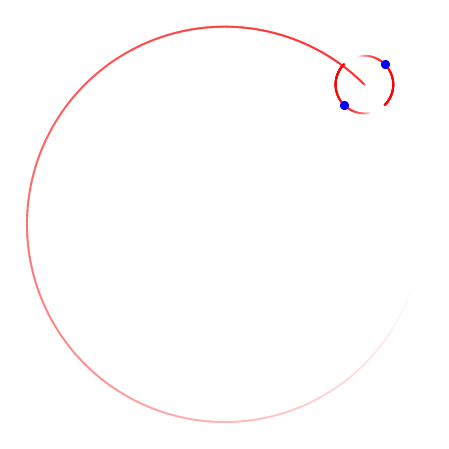

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-radius - 1, radius + 1)
# ax.set_ylim(-radius - 1, radius + 1)
ax.set_aspect('equal')
ax.axis('off')
plot_bin_planets(1.4**3, 0.4, 5, np.pi/4, inc)
plt.show()

In [ ]:
gaps